In [1]:
import pandas as pd
import numpy as np

# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [2]:
transactions = pd.read_csv("../project_data/project_transactions.csv",
                          dtype={"DAY": "Int16",
                                 "QUANTITY": "Int32",
                                 "STORE_ID": "Int32",
                                 "WEEK_NO": "Int8",}
                          )

In [3]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [4]:
# Reduced memory usage by ~35MB after converting to correct dtypes

transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                Int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           Int32  
 5   SALES_VALUE        float64
 6   STORE_ID           Int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            Int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: Int16(1), Int32(2), Int8(1), float64(4), int64(3)
memory usage: 145.3 MB


In [6]:
# Use to identify which values can be downcast

transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0,3268.0,-1.0,56.0,-0.0,-0.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0,9122.0,1.0,27.0,0.0,0.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.0,1.0,-56.0,-8.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0,330.0,-1.0,33.0,0.0,0.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0,372.0,0.0,57.0,0.0,0.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0,422.0,0.0,80.0,0.0,0.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0,34280.0,4.0,102.0,0.0,0.0


In [7]:
# Check missing value counts

transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [7]:
# Calculate unique households in dataset with nunique (describe could also be used)

transactions["household_key"].nunique()

2099

In [8]:
# Calculate unique product_ids in dataset with nunique

transactions["PRODUCT_ID"].nunique()

84138

## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than one, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [9]:
# create a discount sum column and a percentage discount column
transactions = (
    transactions
    .assign(total_discount = transactions["RETAIL_DISC"] + transactions["COUPON_DISC"],
            percentage_discount = (lambda x: (x["total_discount"] / x["SALES_VALUE"]).abs()))
    .drop(["RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"], axis=1))


# Use where to cap values above 1 at 1 and below 0 at 0. Other methods could be used here as well.
transactions["percentage_discount"] = (transactions["percentage_discount"]
                                       .where(transactions["percentage_discount"] < 1, 1.0)
                                       .where(transactions["percentage_discount"] > 0, 0)
                                      )

transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 
* What was the highest quantiy sold for a single item in a single row?

In [10]:
# Total Sales Value

transactions['SALES_VALUE'].sum()

6666243.499999999

In [11]:
# Total Discount

transactions['total_discount'].sum()

-1178658.0799999998

In [12]:
# Overall Percent Discount

transactions['total_discount'].sum() / transactions['SALES_VALUE'].sum()

-0.1768099350106248

In [13]:
# Average of pct_discount column

transactions["percentage_discount"].mean()

0.20732444073964212

In [14]:
# Total Quantity Sold

transactions['QUANTITY'].sum()

216713611

In [15]:
# Max quantity in single row

transactions["QUANTITY"].max()

89638

In [16]:
# Use to grab row with max value - discount rate is lower than average

transactions.loc[transactions["QUANTITY"].argmax()]

household_key                  630.0
BASKET_ID              34749153595.0
DAY                            503.0
PRODUCT_ID                 6534178.0
QUANTITY                     89638.0
SALES_VALUE                    250.0
STORE_ID                       384.0
WEEK_NO                         73.0
total_discount                -13.45
percentage_discount           0.0538
Name: 1442095, dtype: Float64

In [17]:
# Sales value per transaction/basket

transactions['SALES_VALUE'].sum() / transactions['BASKET_ID'].nunique()

28.61797938516092

In [18]:
# Sales value per household

transactions['SALES_VALUE'].sum() / transactions['household_key'].nunique()

3175.9140066698424

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


<AxesSubplot:ylabel='Frequency'>

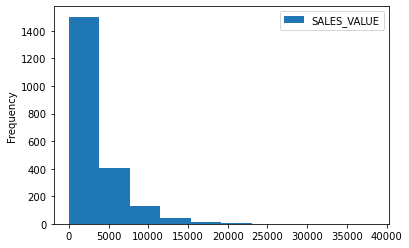

In [19]:
# plot distribution of households by total sales value
# First groupby household and calculate sum of sales
# then plot with a histogram

(transactions
 .groupby("household_key")
 .agg({'SALES_VALUE': 'sum'})
 .plot.hist())

In [20]:
# store top 10 households by total value and quantity
# groupby household_key, calculate sum of relevant columns by household
# sort both by relevant metric in descending order, and grab top 10 rows

top10_value = (transactions
 .groupby("household_key")
 .agg({'SALES_VALUE': 'sum'})
 .sort_values("SALES_VALUE", ascending=False)
 .iloc[:10])

top10_quant = (transactions
 .groupby("household_key")
 .agg({"QUANTITY": "sum"})
 .sort_values("QUANTITY", ascending=False)
 .iloc[:10])

In [21]:
top10_value

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


In [22]:
top10_quant

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [23]:
# Use multiple aggregation to create both in a single table an option
# this here is just to use to compare to chart

(transactions
 .groupby("household_key")
 .agg({'SALES_VALUE': 'sum','QUANTITY': 'sum'})
 .sort_values("SALES_VALUE", ascending=False)
 .loc[:, "SALES_VALUE"]
 .describe()
)

count     2099.000000
mean      3175.914007
std       3287.043772
min          8.170000
25%        971.035000
50%       2145.710000
75%       4295.395000
max      38319.790000
Name: SALES_VALUE, dtype: float64

<AxesSubplot:xlabel='household_key'>

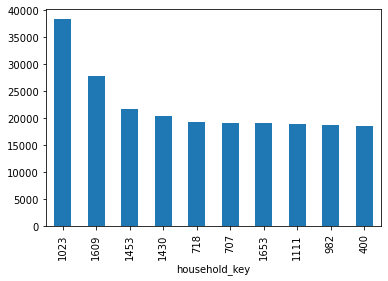

In [24]:
# top 10 households by sales value plotted with a bar plot

top10_value["SALES_VALUE"].plot.bar()

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top selling items have a higher than average discount rate?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* What was the name most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the product name of the item that had the highest quantity sold in a single row.

In [25]:
# Create top 10 products by sales df
# group by PRODUCT_ID and sum sales value by product
# Sort in descending order and grab top 10 rows

top10_products = (transactions
                 .groupby(["PRODUCT_ID"])
                 .agg({"SALES_VALUE": "sum"})
                 .sort_values("SALES_VALUE", ascending=False)
                 .iloc[:10]
)

<AxesSubplot:ylabel='PRODUCT_ID'>

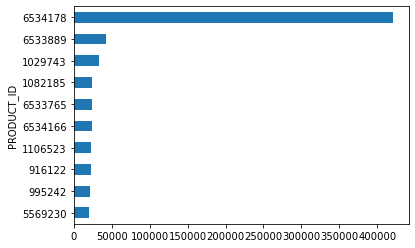

In [26]:
# plot top 10 products by sale value

top10_products["SALES_VALUE"].sort_values().plot.barh()

In [27]:
# Calculate the total discount for top 10 products
# Divide that by sales value for top 10 products

((transactions
 .query("PRODUCT_ID in @top10_products.index")
 .loc[: ,"total_discount"]
 .sum()) 
/(transactions
 .query("PRODUCT_ID in @top10_products.index")
 .loc[: ,"SALES_VALUE"]
  .sum())
)

-0.10331267387397927

In [28]:
# read in products data

products = pd.read_csv("../project_data/product.csv")

products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [29]:
# Look up top 10 products for households in top10_value table
# Use query to reference index of top10_value to filter to relevant households
# Use value counts to get counts by product_id (this will be order in descending order)
# Then grab the top 10 products with iloc and extract the index to get product numbers

top_hh_products = (transactions
                   .query("household_key in @top10_value.index")
                   .loc[:, "PRODUCT_ID"]
                   .value_counts()
                   .iloc[:10]
                   .index)

In [30]:
# Filter product table to products from prior cell
products.query("PRODUCT_ID in @top_hh_products")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [32]:
# Product with highest quantity in a single row

products.query("PRODUCT_ID == 6534178")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [33]:
# Look up 10 product names for all customers (from first cell)

products.query("PRODUCT_ID in @top10_products.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
